Neha Vishwakarma Practical 2

In [15]:
#importing the libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import random

In [9]:
#grabbing CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


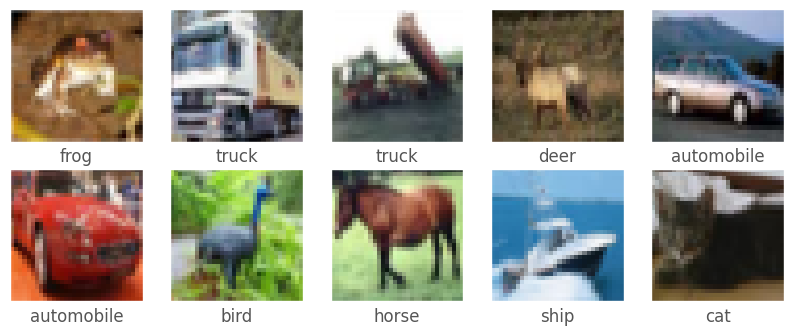

In [10]:
#showing images of mentioned categories
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [11]:
#building CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [12]:
#model compilation
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
epochs = 1
h = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

1563/1563 [==============================] - 66s 41ms/step - loss: 1.5019 - accuracy: 0.4532 - val_loss: 1.2812 - val_accuracy: 0.5409


In [14]:
test_loss, test_acc= model.evaluate(test_images,test_labels)
print("loss %3f"%test_loss)
print("acc %3f"%test_acc)
pred_values= model.predict(test_images)
pred_values.shape

313/313 [==============================] - 6s 18ms/step - loss: 1.2812 - accuracy: 0.5409
loss 1.281226
acc 0.540900
313/313 [==============================] - 6s 19ms/step


(10000, 10)

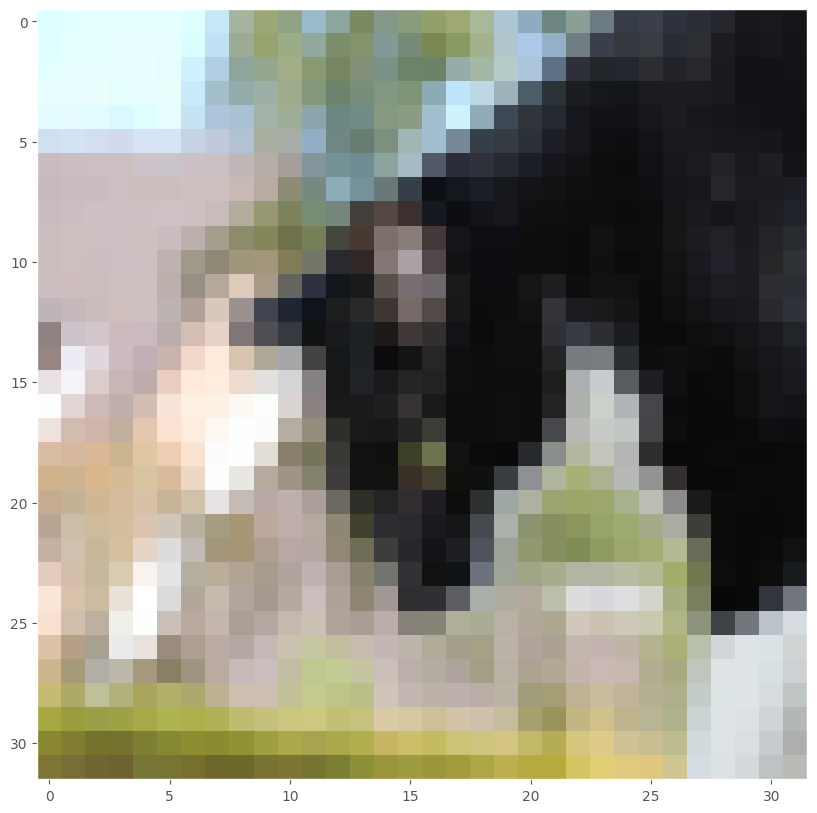

In [23]:
n = random.randint(0,9999)
plt.figure(figsize=(10,10))
plt.imshow(test_images[n])
# line
#plt.xticks([])
#plt.yticks([])
plt.grid(False)
